#Recurrent neural networks(RNN) with long short-term memory(LSTM)

Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.

As powerful as convolutional neural networks (CNNs) are, they don't handle sequential data so well; however, they are great for non-sequential tasks, such as image classification.

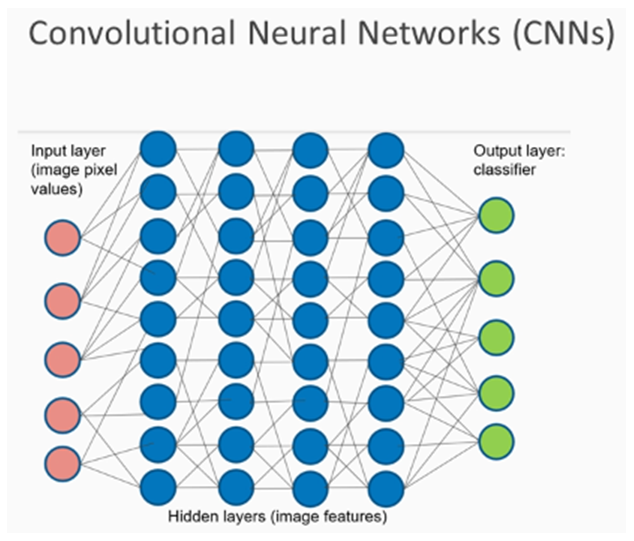

Recurrent neural networks (RNNs), which really are state of the art, can handle sequential tasks. An RNN consists of CNNs where data is received in a sequence.

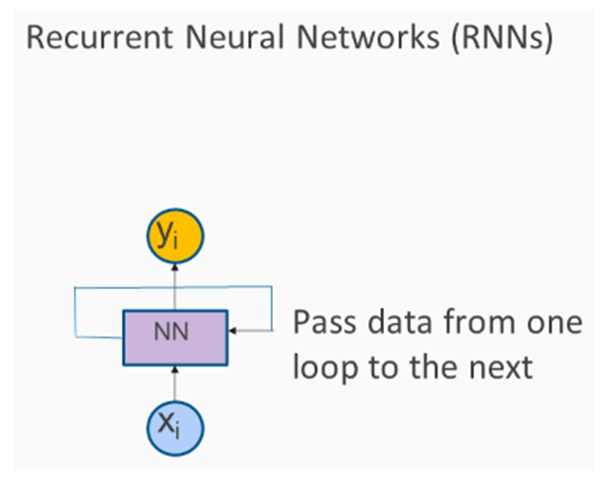

Data coming in a sequence (xi) goes through the neural network and we get an output (yi). The output is then fed through to another iteration and forms a loop. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition, language translation, video identification, and text generation.

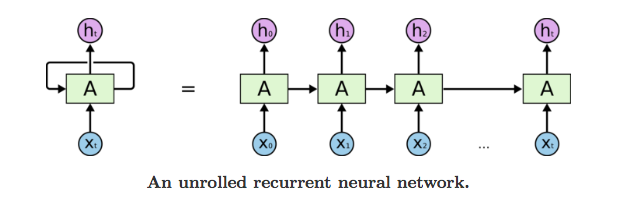

This chain-like nature reveals that recurrent neural networks are intimately related to sequences and lists. They’re the natural architecture of neural network to use for such data.

First, it takes the X(0) from the sequence of input and then it outputs h(0) which together with X(1) is the input for the next step. So, the h(0) and X(1) is the input for the next step. Similarly, h(1) from the next is the input with X(2) for the next step and so on. This way, it keeps remembering the context while training.

###Advantages of Recurrent Neural Network
1. RNN can model sequence of data so that each sample can be assumed to be dependent on previous ones
2. Recurrent neural network are even used with convolutional layers to extend the effective pixel neighbourhood.

###Disadvantages of Recurrent Neural Network
1. Gradient vanishing and exploding problems.
2. Training an RNN is a very difficult task.
3. It cannot process very long sequences if using tanh or relu as an activation function.

#What is Long Short Term Memory (LSTM)?

Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. In an LSTM network, three gates are present:

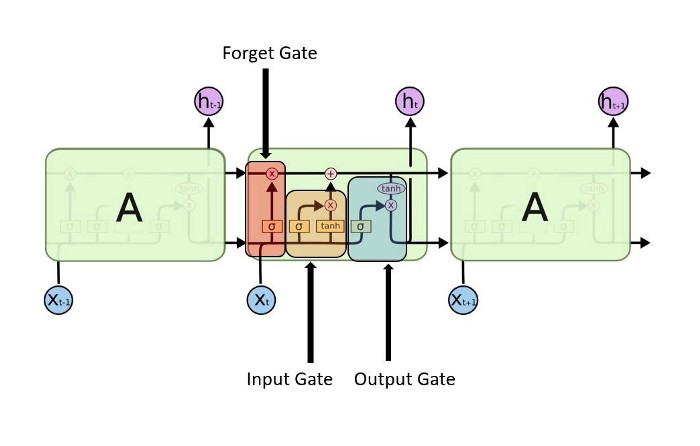

 Input gate  — discover which value from input should be used to modify the memory. Sigmoid function decides which values to let through 0,1. and tanh function gives weightage to the values which are passed deciding their level of importance ranging from-1 to 1.

 Forget gate — discover what details to be discarded from the block. It is decided by the sigmoid function. it looks at the previous state (ht-1) and the content input(Xt) and outputs a number between 0(omit this)and 1(keep this)for each number in the cell state Ct−1

 Output gate — the input and the memory of the block is used to decide the output. Sigmoid function decides which values to let through 0,1. and tanh function gives weightage to the values which are passed deciding their level of importance ranging from-1 to 1 and multiplied with output of Sigmoid.

 [Details](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [ ]:
#import required packages/library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM#, CuDNNLSTM

Similar to before, we load in our data, and we can see the shape again of the dataset and individual samples:

In [ ]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255
x_test = x_test/255

print("x_train =",x_train.shape)
print("y_train =",y_train.shape)
print("x_test =",x_test.shape)
print("y_test =",y_test.shape)

print(x_train[0].shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train = (60000, 28, 28)
y_train = (60000,)
x_test = (10000, 28, 28)
y_test = (10000,)
(28, 28)


Recall we had to flatten this data for the regular deep neural network. In this model, we're passing the rows of the image as the sequences. So basically, we're showing the the model each pixel row of the image, in order, and having it make the prediction. (28 sequences of 28 elements)

In [ ]:
model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

#return_sequences= True   # This flag is used for when you're continuing on to another recurrent layer.

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax')) #output layer 

This should all be straight forward, where rather than Dense or Conv, we're just using LSTM as the layer type. The only new thing is return_sequences. This flag is used for when you're continuing on to another recurrent layer. If you are, then you want to return sequences. If you're not going to another recurrent-type of layer, then you don't set this to true.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

Compile the model

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

Training to the model

In [ ]:
model.fit(x_train,y_train,
          epochs=3,verbose=1)

Epoch 1/3
1875/1875 [==============================] - 115s 60ms/step - loss: 1.1844 - accuracy: 0.5970
Epoch 2/3
1875/1875 [==============================] - 112s 60ms/step - loss: 0.1740 - accuracy: 0.9510
Epoch 3/3
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1176 - accuracy: 0.9676


In [ ]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.2265 - accuracy: 0.9315
Test score: 0.22654850780963898
Test accuracy: 0.9315000176429749
